In [78]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [79]:
df2 = pd.read_csv('project_data.csv')

In [80]:
df2.shape

(1107069, 191)

In [81]:
df2.isna().sum()

customer_ID         0
S_2                 0
P_2              9129
D_39                0
B_1                 0
                ...  
D_142          918606
D_143           20040
D_144            8126
D_145           20040
target              0
Length: 191, dtype: int64

In [82]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
P_2,1097940.0,0.656596,0.244994,-4.205811e-01,0.480902,0.695093,0.865177,1.010000
D_39,1107069.0,0.153238,0.270531,9.052854e-09,0.004536,0.009056,0.236728,5.362196
B_1,1107069.0,0.123605,0.211577,-1.832537e+00,0.008824,0.031182,0.125633,1.324059
B_2,1106702.0,0.622093,0.400946,5.485064e-08,0.106463,0.814329,1.002380,1.010000
R_1,1107069.0,0.079059,0.226810,1.065542e-08,0.002893,0.005778,0.008664,3.006102
...,...,...,...,...,...,...,...,...
D_142,188463.0,0.390392,0.235563,-1.444070e-02,0.200952,0.381682,0.557324,2.145717
D_143,1087029.0,0.178223,0.378451,2.565179e-08,0.003027,0.006044,0.009071,1.010000
D_144,1098943.0,0.052191,0.182150,4.701217e-09,0.002757,0.005506,0.008261,1.343331
D_145,1087029.0,0.062187,0.193690,2.811854e-09,0.003026,0.006049,0.009080,4.827630


In [83]:
missing_percent = (df2.isnull().sum() / len(df2)) * 100
missing_percent

customer_ID     0.000000
S_2             0.000000
P_2             0.824610
D_39            0.000000
B_1             0.000000
                 ...    
D_142          82.976400
D_143           1.810185
D_144           0.734010
D_145           1.810185
target          0.000000
Length: 191, dtype: float64

In [84]:
columns_to_drop = missing_percent[missing_percent > 95].index

In [85]:
df2.drop(columns=columns_to_drop, inplace=True)

In [86]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107069 entries, 0 to 1107068
Columns: 178 entries, customer_ID to target
dtypes: float64(172), int64(2), object(4)
memory usage: 1.5+ GB


In [87]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df2.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [88]:
df2.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145,target
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,0.009972,0.006557,0.008263,0.006609,0.007370,NaN,0.007171,0.005120,0.007513,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,0.004756,0.004508,0.001986,0.004050,0.000796,NaN,0.001802,0.002364,0.003987,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,0.004626,0.004717,0.009515,0.008757,0.009219,NaN,0.003134,0.001686,0.001265,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,0.006350,0.003930,0.002524,0.007841,0.007421,NaN,0.000728,0.003591,0.007998,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,0.007928,0.008928,0.003823,0.009599,0.006957,NaN,0.008746,0.007101,0.006658,0


In [89]:
columns_to_encode = ['B_30', 'B_38', 'D_114', 'D_116', 'D_117', 'D_120', 'D_126', 'D_63', 'D_64', 'D_66', 'D_68']

# Perform one-hot encoding
df = pd.get_dummies(df2, columns=columns_to_encode)


In [90]:
df.head(5)

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,0,0,0,0,0,0,0,0,0,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,0,0,0,0,0,0,0,0,0,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,0,0,0,0,0,1,0,0,0,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,0,0,0,0,0,1,0,0,0,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,0,0,0,0,0,1,0,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107069 entries, 0 to 1107068
Columns: 212 entries, customer_ID to D_68_6.0
dtypes: float64(163), int64(2), object(2), uint8(45)
memory usage: 1.4+ GB


In [92]:
df

,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
0,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-03-11,0.374606,0.033519,0.044293,1.008622,0.001470,0.459235,0.002339,0.006168,...,0,0,0,0,0,0,0,0,0,0
1,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-04-22,0.414269,0.002516,0.059667,0.123964,0.004374,0.434148,0.001405,0.052130,...,0,0,0,0,0,0,0,0,0,0
2,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-05-12,0.413310,0.003285,0.053418,0.304955,0.002316,0.415906,0.009388,0.048780,...,0,0,0,0,0,1,0,0,0,0
3,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-06-10,0.328983,0.038574,0.049463,0.115654,0.004654,0.416112,0.003223,0.081001,...,0,0,0,0,0,1,0,0,0,0
4,000098081fde4fd64bc4d503a5d6f86a0aedc425c96f52...,2017-07-19,0.496989,0.005552,0.041452,0.133631,0.007363,0.419864,0.003393,0.098308,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1107064,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-11-05,0.979332,0.416013,0.020818,0.828199,0.003487,0.090743,0.005340,0.025139,...,0,0,0,0,0,0,0,0,1,0
1107065,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2017-12-23,0.984907,0.296536,0.007209,0.812610,0.005904,0.079886,0.002243,0.023691,...,0,0,0,0,0,0,0,0,1,0
1107066,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-01-06,0.983019,0.443984,0.013151,0.815422,0.003457,0.100503,0.002111,0.012343,...,0,0,0,0,0,0,0,0,1,0
1107067,fffff1d38b785cef84adeace64f8f83db3a0c31e8d92ea...,2018-02-06,0.969861,0.442553,0.009855,1.003541,0.005117,0.101802,0.009930,0.008578,...,0,0,0,0,0,0,0,0,1,0


In [93]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df.dtypes)

customer_ID     object
S_2             object
P_2            float64
D_39           float64
B_1            float64
B_2            float64
R_1            float64
S_3            float64
D_41           float64
B_3            float64
D_42           float64
D_43           float64
D_44           float64
B_4            float64
D_45           float64
B_5            float64
R_2            float64
D_46           float64
D_47           float64
D_48           float64
D_49           float64
B_6            float64
B_7            float64
B_8            float64
D_50           float64
D_51           float64
B_9            float64
R_3            float64
D_52           float64
P_3            float64
B_10           float64
D_53           float64
S_5            float64
B_11           float64
S_6            float64
D_54           float64
R_4            float64
S_7            float64
B_12           float64
S_8            float64
D_55           float64
D_56           float64
B_13           float64
R_5        

In [94]:
numeric_columns = df.select_dtypes(include=np.float64).columns.tolist()
average_data = df.groupby('customer_ID')[numeric_columns].mean()
average_data 

,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,D_42,D_43,...,D_132,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.444606,0.010394,0.070828,0.247854,0.003958,0.357354,0.005414,0.127152,0.142407,0.080426,...,NaN,0.006729,0.005627,0.004019,0.005165,0.006285,NaN,0.004908,0.005719,0.005654
000445609ff2a39d2dd02484899affa5696210a95f6869f26390bd26eeb3b651,0.972260,0.005031,0.005157,0.816084,0.003508,0.171883,0.005562,0.006415,NaN,0.013120,...,NaN,0.004350,0.004701,0.005677,0.005229,0.005495,NaN,0.004264,0.004563,0.004215
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff4b5b317ac251abda0,0.665203,0.450042,0.494706,0.047334,0.048791,0.379823,0.005174,0.289680,NaN,0.092329,...,NaN,0.006248,0.004829,0.005812,0.005295,0.004265,NaN,0.005930,0.005006,0.004138
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704029f989240c733b6d0,0.970309,0.367651,0.040324,1.006227,0.044113,0.107196,0.005557,0.005767,NaN,0.062928,...,NaN,0.003630,0.005839,0.005406,0.005446,0.004112,NaN,0.005726,0.004497,0.005466
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470ff272f9409103d067f,0.953131,0.219669,0.032479,0.820899,0.005651,0.018259,0.118203,0.004899,NaN,NaN,...,NaN,0.005910,0.006313,0.005107,0.004580,0.006094,NaN,0.004766,0.004060,0.006201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88,0.513501,0.228928,0.895741,0.316005,0.067015,0.955474,0.004115,0.159526,0.077539,0.287972,...,NaN,0.004993,0.004014,0.007199,0.005508,0.005330,NaN,0.006182,0.004696,0.006129
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.859327,0.066421,0.368335,0.042358,0.005542,0.273668,0.005306,0.271978,NaN,0.327520,...,0.281848,1.014297,0.006061,0.005071,0.003799,0.005458,NaN,0.004469,0.006052,0.005622
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,0.786838,0.221548,0.043031,0.854813,0.004751,0.084385,0.182801,0.057544,NaN,0.121265,...,NaN,0.004848,0.005097,0.004716,0.003858,0.004838,NaN,0.006621,0.004860,0.003917


In [95]:
int_columns = df.select_dtypes(include=np.int64).columns.tolist()
average_int_data = df.groupby('customer_ID')[int_columns].mean()
average_int_data.head()
#agg(['mean','median','std']).plot.bar()

,B_31,target
customer_ID,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,1.0,0.0
000445609ff2a39d2dd02484899affa5696210a95f6869f26390bd26eeb3b651,1.0,0.0
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff4b5b317ac251abda0,1.0,0.0
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704029f989240c733b6d0,1.0,0.0
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470ff272f9409103d067f,1.0,0.0


In [96]:
binary_columns = df.select_dtypes(include=np.uint8).columns.tolist()
average_binary_data = df.groupby('customer_ID')[binary_columns].mean()
average_binary_data

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_64_U,D_66_0.0,D_66_1.0,D_68_0.0,D_68_1.0,D_68_2.0,D_68_3.0,D_68_4.0,D_68_5.0,D_68_6.0
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.769231,0.076923,0.153846,0.538462,0.000000,0.076923,0.000,0.384615,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.538462,0.307692,0.000000,0.000000,0.000000
000445609ff2a39d2dd02484899affa5696210a95f6869f26390bd26eeb3b651,1.000000,0.000000,0.000000,0.615385,0.384615,0.000000,0.000,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff4b5b317ac251abda0,0.461538,0.538462,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.230769,0.769231,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704029f989240c733b6d0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,0.538462,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.538462,0.461538
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470ff272f9409103d067f,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fffe2bc02423407e33a607660caeed076d713d8a5ad32321530e92704835da88,0.375000,0.625000,0.000000,0.375000,0.000000,0.000000,0.625,0.000000,0.000000,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.500000,0.000000,0.000000,0.000000
ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fdd3e5b57cfcbee30286,0.230769,0.769231,0.000000,0.000000,0.000000,0.076923,0.000,0.000000,0.000000,0.923077,...,0.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000
ffff9984b999fccb2b6127635ed0736dda94e544e67e026eee4d20f680639ff6,1.000000,0.000000,0.000000,0.000000,0.461538,0.538462,0.000,0.000000,0.000000,0.000000,...,1.000000,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000


In [97]:
merged_data = pd.merge(average_binary_data, average_int_data, on='customer_ID')

# Join merged_data with average_data on a common column (e.g., customer_ID)
data = pd.merge(merged_data, average_data, on='customer_ID')
#data = average_data.join(grouped_data)
data.head()

,B_30_0.0,B_30_1.0,B_30_2.0,B_38_1.0,B_38_2.0,B_38_3.0,B_38_4.0,B_38_5.0,B_38_6.0,B_38_7.0,...,D_132,D_133,R_28,D_139,D_140,D_141,D_142,D_143,D_144,D_145
customer_ID,,,,,,,,,,,,,,,,,,,,,
000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4,0.769231,0.076923,0.153846,0.538462,0.000000,0.076923,0.0,0.384615,0.000000,0.000000,...,NaN,0.006729,0.005627,0.004019,0.005165,0.006285,NaN,0.004908,0.005719,0.005654
000445609ff2a39d2dd02484899affa5696210a95f6869f26390bd26eeb3b651,1.000000,0.000000,0.000000,0.615385,0.384615,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,0.004350,0.004701,0.005677,0.005229,0.005495,NaN,0.004264,0.004563,0.004215
0004837f0c785928a29a6f83f70f4a1c54caec483a773ff4b5b317ac251abda0,0.461538,0.538462,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.230769,0.769231,...,NaN,0.006248,0.004829,0.005812,0.005295,0.004265,NaN,0.005930,0.005006,0.004138
0004ec03ca1ab2adb9aa260c61ba5dce8185e19d3ab704029f989240c733b6d0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,0.003630,0.005839,0.005406,0.005446,0.004112,NaN,0.005726,0.004497,0.005466
00050d84c6d26e26cd2b18c3eed83d3130c270e2361470ff272f9409103d067f,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,NaN,0.005910,0.006313,0.005107,0.004580,0.006094,NaN,0.004766,0.004060,0.006201


In [98]:
duplicate_count = data.duplicated().sum()
duplicate_count

0

In [99]:
# check data types - objects imply non-numeric
# note that sometimes numeric columns appear as Object, because of few non-numeric observations. Such as a character that may represent a special value.
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(data.dtypes)

B_30_0.0      float64
B_30_1.0      float64
B_30_2.0      float64
B_38_1.0      float64
B_38_2.0      float64
B_38_3.0      float64
B_38_4.0      float64
B_38_5.0      float64
B_38_6.0      float64
B_38_7.0      float64
D_114_0.0     float64
D_114_1.0     float64
D_116_0.0     float64
D_116_1.0     float64
D_117_-1.0    float64
D_117_1.0     float64
D_117_2.0     float64
D_117_3.0     float64
D_117_4.0     float64
D_117_5.0     float64
D_117_6.0     float64
D_120_0.0     float64
D_120_1.0     float64
D_126_-1.0    float64
D_126_0.0     float64
D_126_1.0     float64
D_63_CL       float64
D_63_CO       float64
D_63_CR       float64
D_63_XL       float64
D_63_XM       float64
D_63_XZ       float64
D_64_-1       float64
D_64_O        float64
D_64_R        float64
D_64_U        float64
D_66_0.0      float64
D_66_1.0      float64
D_68_0.0      float64
D_68_1.0      float64
D_68_2.0      float64
D_68_3.0      float64
D_68_4.0      float64
D_68_5.0      float64
D_68_6.0      float64
B_31      

In [100]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91782 entries, 000098081fde4fd64bc4d503a5d6f86a0aedc425c96f5235f98b0f47c9d7d8d4 to fffff1d38b785cef84adeace64f8f83db3a0c31e8d92eaba8b115f71cab04681
Columns: 210 entries, B_30_0.0 to D_145
dtypes: float64(210)
memory usage: 147.8+ MB


In [101]:
X_train,X_test1, Y_train, Y_test1 = train_test_split(data.drop('target', axis=1), data['target'], test_size=0.3, random_state=42)
X_test1, X_test2, Y_test1, Y_test2 = train_test_split(X_test1,Y_test1, test_size=0.5, random_state=42)


In [102]:
X_train.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test1.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)
X_test2.replace([-999, -999.0, 'NA'], float('nan'), inplace=True)

In [103]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [104]:
import xgboost as xgb

In [105]:
xgb_instance = xgb.XGBClassifier()

In [106]:
xgb_instance = xgb.XGBClassifier() # nothing inside paranthesis, meaning we are using default parameters, with 100 trees.

model_for_feature_selection = xgb_instance.fit(X_train,Y_train)
model_for_feature_selection

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [107]:

feature_importance = {'Feature':X_train.columns,'Importance':model_for_feature_selection.feature_importances_}
feature_importance = pd.DataFrame(feature_importance)
feature_importance.sort_values("Importance", inplace=True,ascending=False)
feature_importance

,Feature,Importance
46,P_2,0.218859
48,B_1,0.052456
50,R_1,0.042860
0,B_30_0.0,0.028330
54,D_42,0.012490
...,...,...
36,D_66_0.0,0.000000
28,D_63_CR,0.000000
29,D_63_XL,0.000000
30,D_63_XM,0.000000


In [108]:
# choose featires with FI higher than 0.5%
final_features = feature_importance["Feature"][feature_importance.Importance > 0.005]

X1_train = X_train[final_features]
X1_test1 = X_test1[final_features]
X1_test2 = X_test2[final_features]
final_features

46          P_2
48          B_1
50          R_1
0      B_30_0.0
54         D_42
56         D_44
49          B_2
51          S_3
108        B_22
97         D_65
73          P_3
53          B_3
66          B_7
71          R_3
61         D_46
99         B_17
77         B_11
55         D_43
60          R_2
64         D_49
68         D_50
83          S_8
166        S_23
33       D_64_O
37     D_66_1.0
59          B_5
79         D_54
58         D_45
47         D_39
Name: Feature, dtype: object

In [109]:
model = xgb.XGBRegressor(n_estimators=300, learning_rate=0.5, max_depth=4, subsample=0.5, colsample_bytree=0.5, scale_pos_weight=5)
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.5, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=4, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=300, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [110]:
##feature_importance = model.feature_importances_

s_feature_importance = {'Feature':X_train.columns,'Importance':model.feature_importances_}
s_feature_importance = pd.DataFrame(s_feature_importance)
s_feature_importance.sort_values("Importance", inplace=True,ascending=False)
s_feature_importance

,Feature,Importance
63,D_48,0.184707
49,B_2,0.067899
46,P_2,0.053999
54,D_42,0.022973
50,R_1,0.020596
...,...,...
24,D_126_0.0,0.000432
20,D_117_6.0,0.000007
32,D_64_-1,0.000000
31,D_63_XZ,0.000000


In [111]:
#feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
# choose featires with FI higher than 0.5%

final_features_1 = s_feature_importance["Feature"][s_feature_importance.Importance > 0.005]

X2_train = X_train[final_features_1]
X2_test1 = X_test1[final_features_1]
X2_test2 = X_test2[final_features_1]
final_features_1


63     D_48
49      B_2
46      P_2
54     D_42
50      R_1
70      B_9
77     B_11
67      B_8
51      S_3
71      R_3
99     B_17
112    S_15
122    B_26
96     D_62
79     D_54
59      B_5
64     D_49
108    B_22
97     D_65
Name: Feature, dtype: object

In [112]:
merged_feature_importance = pd.concat([feature_importance, s_feature_importance], ignore_index=True)

# Group by 'Feature' and calculate the maximum importance across both models
max_importance = merged_feature_importance.groupby('Feature')['Importance'].max().reset_index()

# Filter features that have importance greater than 0.5% in either of the two models
filtered_features = max_importance[max_importance['Importance'] > 0.005]['Feature']

X3_train = X_train[filtered_features]
X3_test1 = X_test1[filtered_features]
X3_test2 = X_test2[filtered_features]


In [113]:
filtered_features.to_csv('filtered_features.csv', index=False)

In [114]:
filtered_features

0           B_1
2          B_11
8          B_17
11          B_2
14         B_22
18         B_26
22          B_3
23     B_30_0.0
41          B_5
43          B_7
44          B_8
45          B_9
93         D_39
95         D_42
96         D_43
97         D_44
98         D_45
99         D_46
101        D_48
102        D_49
103        D_50
107        D_54
114        D_62
122      D_64_O
125        D_65
127    D_66_1.0
157         P_2
158         P_3
160         R_1
171         R_2
181         R_3
191        S_15
198        S_23
203         S_3
207         S_8
Name: Feature, dtype: object

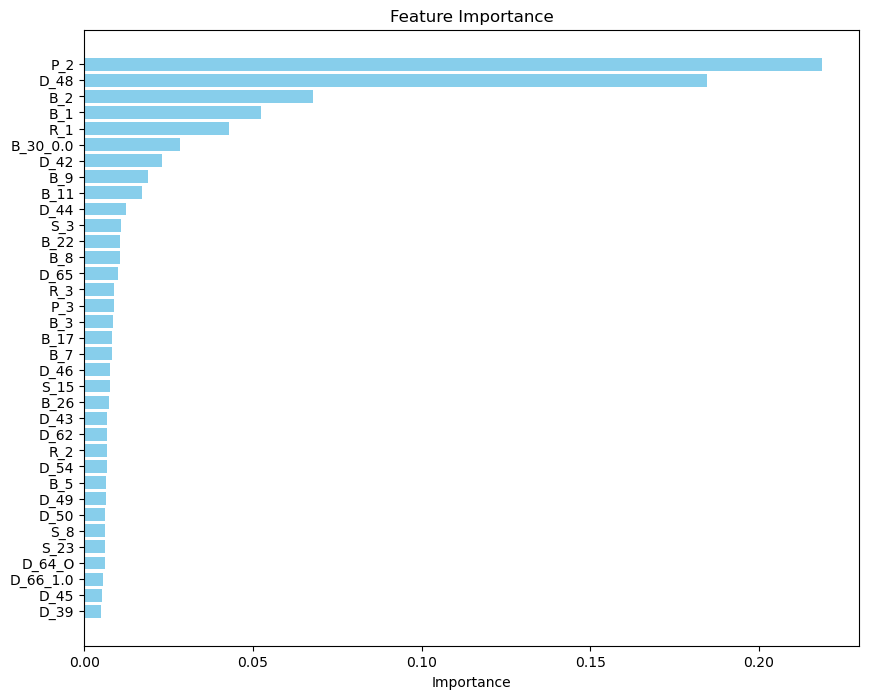

In [115]:
import matplotlib.pyplot as plt

# Assuming 'filtered_features' and 'max_importance' are already defined as per your previous code
filtered_max_importance = max_importance[max_importance['Feature'].isin(filtered_features)]

# Sort the dataframe based on 'Importance' to make the plot easier to understand
filtered_max_importance = filtered_max_importance.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(10, 8))
plt.barh(filtered_max_importance['Feature'], filtered_max_importance['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [116]:
# Here we do grid search only on #trees, and look at the AUC as performance metric.

from sklearn.metrics import roc_auc_score
table = pd.DataFrame(columns = ["Num Trees", "Learning Rate","subsample","colsample_bytree","scale_pos_weight", "AUC Train", "AUC Test1","AUC Test2"])

row = 0
for num_trees in [50, 100, 300]:
  for LR in [0.01, 0.1]:
    for subsample in [0.5,0.8]:
        for colsample_bytree in [0.5,1.0]:
            for scale_pos_weight in [1,5,10]:
               xgb_instance = xgb.XGBClassifier(n_estimators=num_trees, learning_rate = LR,subsample=subsample,colsample_bytree=colsample_bytree,scale_pos_weight=scale_pos_weight)
               model = xgb_instance.fit(X3_train, Y_train)

               table.loc[row,"Num Trees"] = num_trees
               table.loc[row,"Learning Rate"] = LR
               table.loc[row,"subsample"] = subsample
               table.loc[row,"colsample_bytree"] = colsample_bytree
               table.loc[row,"scale_pos_weight"] = scale_pos_weight
               table.loc[row,"AUC Train"] = roc_auc_score(Y_train, model.predict_proba(X3_train)[:,1])
               table.loc[row,"AUC Test1"] = roc_auc_score(Y_test1, model.predict_proba(X3_test1)[:,1])
               table.loc[row,"AUC Test2"] = roc_auc_score(Y_test2, model.predict_proba(X3_test2)[:,1])



               row = row + 1

table

,Num Trees,Learning Rate,subsample,colsample_bytree,scale_pos_weight,AUC Train,AUC Test1,AUC Test2
0,50,0.01,0.5,0.5,1,0.948921,0.940826,0.939061
1,50,0.01,0.5,0.5,5,0.946439,0.938707,0.93778
2,50,0.01,0.5,0.5,10,0.94509,0.937306,0.936715
3,50,0.01,0.5,1.0,1,0.946942,0.93856,0.936401
4,50,0.01,0.5,1.0,5,0.943179,0.935561,0.934789
...,...,...,...,...,...,...,...,...
67,300,0.1,0.8,0.5,5,0.984968,0.94672,0.945573
68,300,0.1,0.8,0.5,10,0.98355,0.946425,0.944782
69,300,0.1,0.8,1.0,1,0.987241,0.947199,0.945842
70,300,0.1,0.8,1.0,5,0.986746,0.945993,0.945515


In [117]:
# Define the thresholds
train_threshold = 0.85
difference_threshold = 0.05

# Initialize the best_auc as 0
best_auc = 0
# Initialize the best model as None
best_model = None

# Loop through each row in the dataframe
for index, row in table.iterrows():
    # Calculate the maximum difference between train AUC and test AUCs
    max_difference = max(abs(row['AUC Train'] - row['AUC Test1']), abs(row['AUC Train'] - row['AUC Test2']))
    
    # Check if the model has low bias (AUC Train > train_threshold) and low variance (max_difference < difference_threshold)
    if row['AUC Train'] > train_threshold and max_difference < difference_threshold:
        # Check if this model has a higher average AUC score on the test sets than the current best model
        average_test_auc = (row['AUC Test1'] + row['AUC Test2']) / 2
        if average_test_auc > best_auc:
            # Update the best_auc and best_model
            best_auc = average_test_auc
            best_model = row

# Print the parameters of the best model
if best_model is not None:
    print(best_model)
else:
    print("No model found that satisfies the given conditions.")


Num Trees                100
Learning Rate            0.1
subsample                0.8
colsample_bytree         1.0
scale_pos_weight           1
AUC Train            0.96913
AUC Test1           0.947497
AUC Test2           0.946224
Name: 45, dtype: object


In [118]:
best_xgb = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, subsample=0.8, colsample_bytree=1.0, scale_pos_weight=1)

# Fit the model on the training data
best_model = best_xgb.fit(X3_train, Y_train)


In [119]:
best_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [120]:
Y_train

customer_ID
e3248dfa6d0acb016d865d83ffdfebd1319b9a0609227d10bed3f39f6b19e284    0.0
072a1f2dffd4b979bbdb4872df40f0a510898d0e101c1ef70cd58eb68e86d5cf    0.0
a68f05576c6be5f88c7d21e390391b0ba6c91f5fed44ca22df447b112bfe16ba    0.0
7abf391015c578a0762ba8b64dc7dfa9de60138af871d93f6610305f6f209c78    1.0
c28d8689a87407dd3876c326c54b31a0a6083ede9b7a9230a413db0a07616264    0.0
                                                                   ... 
11e9d1330e624aad3c59d323da4b7faf37da9bb0c260c1571ad10c2247bd4340    0.0
9908dd887b57ee8319552bb9e911c47eb4df5e9061b5e3857de231694943342a    0.0
d6875f0368d95a15ce9c36aadd9b5bc814f2c3f4e0bbc1f3ed18227d3be15ce4    0.0
02595bb82cde7cb2ef3fddea0677b49e01dedec63da100b303bbe2ed430acd22    0.0
2c24fa244e5b468c0a023f16f271169ca9904c7c6edb6a15c215d5009f95deb5    1.0
Name: target, Length: 64247, dtype: float64

In [121]:
# Rank Ordering
perf_train_data = pd.DataFrame({"Actual": Y_train, "Prediction": best_model.predict_proba(X3_train)[:,1]})
quantiles = list(set(perf_train_data.Prediction.quantile([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])))
quantiles.sort()
quantiles.insert(0,0)
quantiles.insert(len(quantiles),1)

perf_train_data["Score Bins"] = pd.cut(perf_train_data["Prediction"], quantiles)
stat = perf_train_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat["Bad Rate"] = stat["sum"] / stat["count"]
stat

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00188]",0.0,6425,0.000000
"(0.00188, 0.00305]",3.0,6425,0.000467
"(0.00305, 0.00537]",3.0,6424,0.000467
"(0.00537, 0.0118]",16.0,6425,0.002490
"(0.0118, 0.0342]",65.0,6425,0.010117
"(0.0342, 0.123]",265.0,6424,0.041252
"(0.123, 0.359]",1224.0,6425,0.190506
"(0.359, 0.654]",3283.0,6424,0.511052
"(0.654, 0.868]",5261.0,6425,0.818833


In [122]:
stat = stat.reset_index()


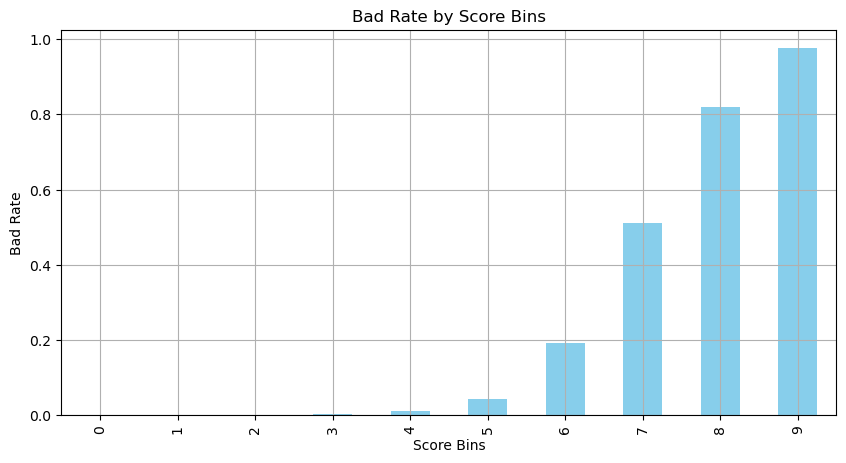

In [123]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(10, 5))
stat['Bad Rate'].plot(kind='bar', color='skyblue')
plt.xlabel('Score Bins')
plt.ylabel('Bad Rate')
plt.title('Bad Rate by Score Bins')
plt.grid(True)
plt.show()


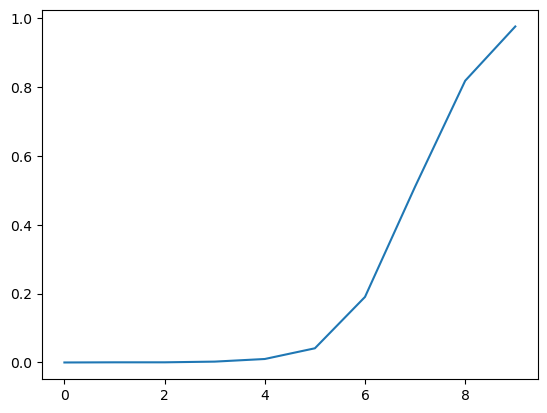

In [124]:
import matplotlib.pyplot as plt

plt.plot(stat["Bad Rate"])

In [125]:
perf_test_data = pd.DataFrame({"Actual": Y_test1, "Prediction": best_model.predict_proba(X3_test1)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat1 = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat1["Bad Rate"] = stat1["sum"] / stat1["count"]
stat1

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00188]",1.0,1365,0.000733
"(0.00188, 0.00305]",3.0,1370,0.002190
"(0.00305, 0.00537]",3.0,1336,0.002246
"(0.00537, 0.0118]",11.0,1441,0.007634
"(0.0118, 0.0342]",27.0,1356,0.019912
"(0.0342, 0.123]",108.0,1347,0.080178
"(0.123, 0.359]",353.0,1419,0.248767
"(0.359, 0.654]",722.0,1401,0.515346
"(0.654, 0.868]",1045.0,1423,0.734364


In [126]:
stat1 = stat1.reset_index()

In [127]:
perf_test_data = pd.DataFrame({"Actual": Y_test2, "Prediction": best_model.predict_proba(X3_test2)[:,1]})

perf_test_data["Score Bins"] = pd.cut(perf_test_data["Prediction"], quantiles)
stat2 = perf_test_data.groupby("Score Bins")["Actual"].agg(["sum", "count"])
stat2["Bad Rate"] = stat2["sum"] / stat2["count"]
stat2

,sum,count,Bad Rate
Score Bins,,,
"(0.0, 0.00188]",1.0,1363,0.000734
"(0.00188, 0.00305]",3.0,1313,0.002285
"(0.00305, 0.00537]",7.0,1340,0.005224
"(0.00537, 0.0118]",10.0,1335,0.007491
"(0.0118, 0.0342]",28.0,1331,0.021037
"(0.0342, 0.123]",103.0,1319,0.078089
"(0.123, 0.359]",364.0,1466,0.248295
"(0.359, 0.654]",775.0,1485,0.521886
"(0.654, 0.868]",1081.0,1428,0.757003


In [128]:
stat2 = stat2.reset_index()

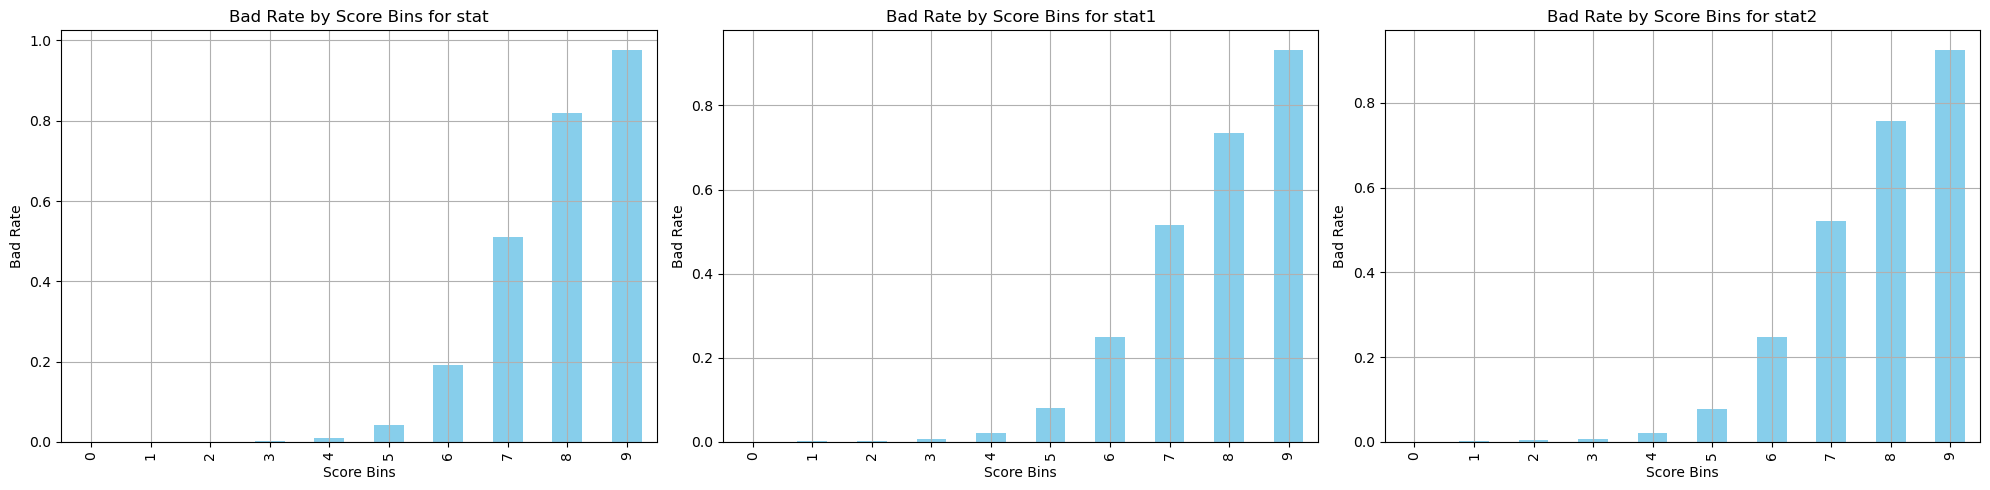

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))  # Create 3 subplots in a row

stat['Bad Rate'].plot(kind='bar', color='skyblue', ax=ax[0])
ax[0].set_title('Bad Rate by Score Bins for stat')
ax[0].set_xlabel('Score Bins')
ax[0].set_ylabel('Bad Rate')
ax[0].grid(True)

stat1['Bad Rate'].plot(kind='bar', color='skyblue', ax=ax[1])
ax[1].set_title('Bad Rate by Score Bins for stat1')
ax[1].set_xlabel('Score Bins')
ax[1].set_ylabel('Bad Rate')
ax[1].grid(True)

stat2['Bad Rate'].plot(kind='bar', color='skyblue', ax=ax[2])
ax[2].set_title('Bad Rate by Score Bins for stat2')
ax[2].set_xlabel('Score Bins')
ax[2].set_ylabel('Bad Rate')
ax[2].grid(True)

plt.tight_layout()
plt.show()


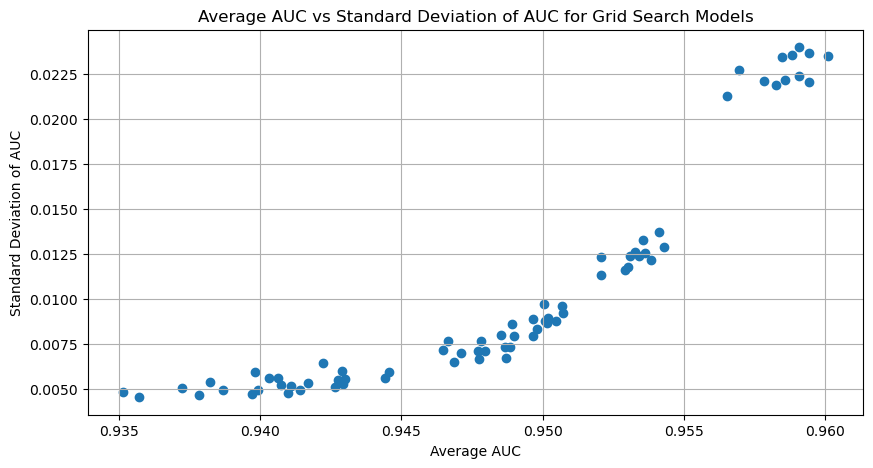

In [130]:
# Calculate average and standard deviation of AUCs
table['Average AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].mean(axis=1)
table['Standard Deviation AUC'] = table[['AUC Train', 'AUC Test1', 'AUC Test2']].std(axis=1)

# Create scatter plot (Average AUC vs Standard Deviation of AUC)
plt.figure(figsize=(10, 5))
plt.scatter(table['Average AUC'], table['Standard Deviation AUC'])
plt.xlabel('Average AUC')
plt.ylabel('Standard Deviation of AUC')
plt.title('Average AUC vs Standard Deviation of AUC for Grid Search Models')
plt.grid(True)
plt.show()


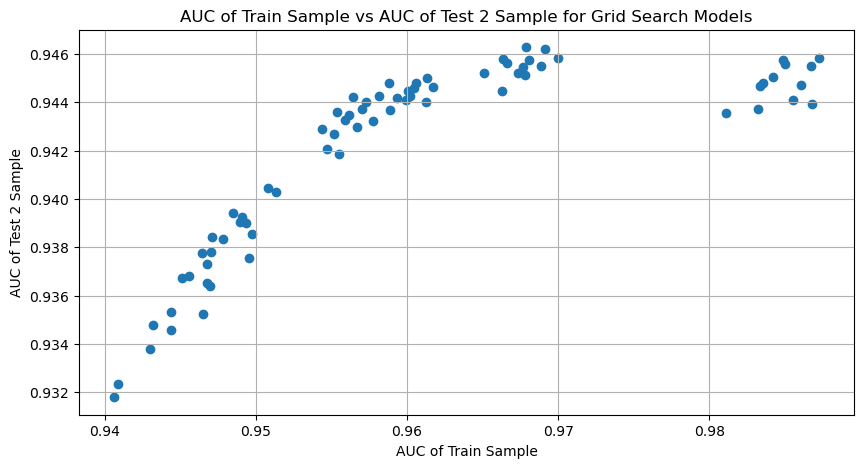

In [131]:
# Create scatter plot (AUC of train sample vs AUC of Test 2 sample)
plt.figure(figsize=(10, 5))
plt.scatter(table['AUC Train'], table['AUC Test2'])
plt.xlabel('AUC of Train Sample')
plt.ylabel('AUC of Test 2 Sample')
plt.title('AUC of Train Sample vs AUC of Test 2 Sample for Grid Search Models')
plt.grid(True)
plt.show()


In [132]:
pip install shap

  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.3
    Uninstalling numpy-1.24.3:
      Successfully uninstalled numpy-1.24.3
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\prana\\anaconda3\\Lib\\site-packages\\~=mpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.



In [133]:
import shap
shap.initjs()

SystemError: initialization of _internal failed without raising an exception

In [ ]:
explainer = shap.Explainer(best_model)
shap_values = explainer(X3_test2)

In [ ]:
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:,"D_46"])

In [ ]:
shap.plots.scatter(shap_values[:,"D_46"], color=shap_values[:,"B_11"])

In [ ]:
shap.plots.waterfall(shap_values[1100])

In [ ]:
import shap

# Create a Tree explainer object
explainer = shap.Explainer(best_model)

# Compute SHAP values
shap_values = explainer.shap_values(X3_train)

# Compute mean absolute SHAP values for each feature
mean_abs_shap_values = np.mean(np.abs(shap_values), axis=0)

# Get feature names
feature_names = X3_train.columns

# Create a DataFrame of feature importances
feature_importances = pd.DataFrame({
    'feature': feature_names,
    'importance': mean_abs_shap_values
})

# Sort DataFrame by importance
feature_importances = feature_importances.sort_values('importance', ascending=False)

# Get top 5 features
top_5_features = feature_importances['feature'].head(5).values

# Calculate summary statistics for top 5 features
summary_stats = X3_train[top_5_features].describe()

# Print the summary statistics
summary_stats.transpose()


Model 1 (Neural Network): It has AUCs of 0.934, 0.933, and 0.933 on the training, test1, and test2 sets, respectively. These numbers are fairly close, suggesting that the model is not overfitting and hence has low variance. The performance (as measured by AUC) is quite good, suggesting that the model also has low bias.

Model 2 (XGBoost): It has AUCs of 0.969, 0.947, and 0.946 on the training, test1, and test2 sets, respectively. There is a bigger gap between the training and test AUCs, suggesting the model may have a slightly higher variance than Model 1. However, the difference is not substantial, and the performance on the test sets is still very good. This model appears to have a low bias and a slightly higher variance compared to Model 1.

Both models seem to have a good balance of bias and variance, given their performances on the test sets are relatively close to their performances on the training sets. But if you want to prioritize a model that likely has a lower variance (and thus may generalize slightly better to new data), Model 1 might be a slightly better choice. Conversely, if you want to prioritize the model with the lowest bias (and thus the highest performance on the training set), Model 2 might be the better choice.

In [134]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
X3_test1 = X3_test1[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test1)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test1['predicted_default'] = predicted_default
X3_test1 = X3_test1.assign(target = Y_test1.values)

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    default_rate, expected_revenue = calculate_metrics(X3_test1, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1, Default Rate: 0.01544837980406933, Expected Revenue: 1306.3972698164912
Threshold: 0.2, Default Rate: 0.027917046490428442, Expected Revenue: 1382.7557433579977
Threshold: 0.3, Default Rate: 0.04363169714469041, Expected Revenue: 1421.2331797228917
Threshold: 0.4, Default Rate: 0.058703420112302195, Expected Revenue: 1445.1495416494754
Threshold: 0.5, Default Rate: 0.0755564232721593, Expected Revenue: 1464.7105449077349
Threshold: 0.6, Default Rate: 0.09895736361943772, Expected Revenue: 1480.8583991515088
Threshold: 0.7, Default Rate: 0.12253945735059407, Expected Revenue: 1498.369769596863
Threshold: 0.8, Default Rate: 0.15623430962343096, Expected Revenue: 1512.6994444371746
Threshold: 0.9, Default Rate: 0.19665173308182032, Expected Revenue: 1521.8123145336522


In [135]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
X3_test2 = X3_test2[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_test2['predicted_default'] = predicted_default
X3_test2 = X3_test2.assign(target = Y_test2.values)

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    default_rate, expected_revenue = calculate_metrics(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1, Default Rate: 0.01602975121826109, Expected Revenue: 1261.9756084934677
Threshold: 0.2, Default Rate: 0.03126816226897594, Expected Revenue: 1335.6349343124364
Threshold: 0.3, Default Rate: 0.04629931529181611, Expected Revenue: 1380.1887938292662
Threshold: 0.4, Default Rate: 0.06323499071590674, Expected Revenue: 1409.1543553824897
Threshold: 0.5, Default Rate: 0.08016960851986983, Expected Revenue: 1432.645356506291
Threshold: 0.6, Default Rate: 0.10372938530734632, Expected Revenue: 1453.1592760939334
Threshold: 0.7, Default Rate: 0.13075687254551946, Expected Revenue: 1465.523691651303
Threshold: 0.8, Default Rate: 0.1635596794601434, Expected Revenue: 1476.3982033602433
Threshold: 0.9, Default Rate: 0.20661613769145745, Expected Revenue: 1485.7564717730802


In [136]:
# Remove the additional columns from X3_train
#X3_train = X3_train.drop(columns=['predicted_default', 'target'])

# Subsetting X3_test1 with the columns of X3_train
#X3_test2 = X3_test2[X3_train.columns]

# Predict default probabilities on the test set
predicted_default = best_model.predict_proba(X3_train)[:, 1]

# Add predicted default probabilities and actual target to the test dataframe
X3_train['predicted_default'] = predicted_default
X3_train = X3_train.assign(target = Y_train.values)

# Define the function that calculates default rate and expected revenue
def calculate_metrics(df, threshold):
    accepted_customers = df[df["predicted_default"] < threshold].copy()
    
    # Calculate portfolio default rate
    portfolio_default_rate = accepted_customers['target'].mean()

    # Calculate portfolio expected revenue
    accepted_customers["Monthly_Revenue"] = accepted_customers["B_2"]*0.02 + accepted_customers["S_3"]*0.001
    portfolio_expected_revenue = (accepted_customers[accepted_customers["target"] == 0]["Monthly_Revenue"] * 12).sum()
    
    return portfolio_default_rate, portfolio_expected_revenue

# Test with different thresholds
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    default_rate, expected_revenue = calculate_metrics(X3_test2, threshold)
    print(f"Threshold: {threshold}, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")


Threshold: 0.1, Default Rate: 0.01602975121826109, Expected Revenue: 1261.9756084934677
Threshold: 0.2, Default Rate: 0.03126816226897594, Expected Revenue: 1335.6349343124364
Threshold: 0.3, Default Rate: 0.04629931529181611, Expected Revenue: 1380.1887938292662
Threshold: 0.4, Default Rate: 0.06323499071590674, Expected Revenue: 1409.1543553824897
Threshold: 0.5, Default Rate: 0.08016960851986983, Expected Revenue: 1432.645356506291
Threshold: 0.6, Default Rate: 0.10372938530734632, Expected Revenue: 1453.1592760939334
Threshold: 0.7, Default Rate: 0.13075687254551946, Expected Revenue: 1465.523691651303
Threshold: 0.8, Default Rate: 0.1635596794601434, Expected Revenue: 1476.3982033602433
Threshold: 0.9, Default Rate: 0.20661613769145745, Expected Revenue: 1485.7564717730802


C:\Users\prana\AppData\Local\Temp\ipykernel_11032\2813900233.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X3_train['predicted_default'] = predicted_default


In [137]:
df["predicted_default"] = best_model.predict_proba(df[filtered_features])[:, 1]


# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df, threshold)
    print(f"Mar 2017 - Mar 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1
Mar 2017 - Mar 2018, Default Rate: 0.029903125680192495, Expected Revenue: 100502.17709234997
Threshold: 0.2
Mar 2017 - Mar 2018, Default Rate: 0.05211488949075467, Expected Revenue: 105966.51218409772
Threshold: 0.3
Mar 2017 - Mar 2018, Default Rate: 0.07402071251552815, Expected Revenue: 108520.99740626852
Threshold: 0.4
Mar 2017 - Mar 2018, Default Rate: 0.0953514724492533, Expected Revenue: 110132.0807929614
Threshold: 0.5
Mar 2017 - Mar 2018, Default Rate: 0.11672130039539048, Expected Revenue: 111255.84333594378
Threshold: 0.6
Mar 2017 - Mar 2018, Default Rate: 0.13879702278387165, Expected Revenue: 112098.12149752371
Threshold: 0.7
Mar 2017 - Mar 2018, Default Rate: 0.16177369588474136, Expected Revenue: 112728.68696299367
Threshold: 0.8
Mar 2017 - Mar 2018, Default Rate: 0.18680053415104605, Expected Revenue: 113210.13101542574
Threshold: 0.9
Mar 2017 - Mar 2018, Default Rate: 0.2155357525797349, Expected Revenue: 113549.02741848232


In [72]:
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2

# Divide df2 based on date
df_may17_jan18 = df[(df['S_2'] >= '2017-05-01') & (df['S_2'] <= '2018-01-31')]
df_mar17_apr17 = df[(df['S_2'] >= '2017-03-01') & (df['S_2'] <= '2017-04-30')]
df_feb18_mar18 = df[(df['S_2'] >= '2018-02-01') & (df['S_2'] <= '2018-03-31')]

# Add predicted default probabilities to each time period
df_may17_jan18["predicted_default"] = best_model.predict_proba(df_may17_jan18[filtered_features])[:, 1]
df_mar17_apr17["predicted_default"] = best_model.predict_proba(df_mar17_apr17[filtered_features])[:, 1]
df_feb18_mar18["predicted_default"] = best_model.predict_proba(df_feb18_mar18[filtered_features])[:, 1]

# Function to calculate the number of defaults based on a threshold
def calculate_num_defaults(df, threshold):
    # Classify customers as defaulted if their predicted default probability is above the threshold
    df['is_defaulted'] = df['predicted_default'].apply(lambda x: 1 if x > threshold else 0)
    # Calculate number of defaulted customers
    num_defaults = df['is_defaulted'].sum()
    return num_defaults

# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_may17_jan18 = calculate_num_defaults(df_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_may17_jan18}")

    num_defaults_mar17_apr17 = calculate_num_defaults(df_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Number of defaulted customers: {num_defaults_mar17_apr17}")

    num_defaults_feb18_mar18 = calculate_num_defaults(df_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Number of defaulted customers: {num_defaults_feb18_mar18}")



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 301878
March 2017 - April 2017, Number of defaulted customers: 58808
February 2018 - March 2018, Number of defaulted customers: 75617
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 248951
March 2017 - April 2017, Number of defaulted customers: 46543
February 2018 - March 2018, Number of defaulted customers: 63900
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 211790
March 2017 - April 2017, Number of defaulted customers: 38339
February 2018 - March 2018, Number of defaulted customers: 55975
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 180124
March 2017 - April 2017, Number of defaulted customers: 31400
February 2018 - March 2018, Number of defaulted customers: 49234
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 151348
March 2017 - April 2017, Number of defaulted customers: 25165
February 2018 - March 2018, Number of defaulted customers: 4

In [75]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2



# Divide df2 based on date
df_may17_jan18 = df[(df['S_2'] >= '2017-05-01') & (df['S_2'] <= '2018-01-31')]
df_mar17_apr17 = df[(df['S_2'] >= '2017-03-01') & (df['S_2'] <= '2017-04-30')]
df_feb18_mar18 = df[(df['S_2'] >= '2018-02-01') & (df['S_2'] <= '2018-03-31')]

df_may17_jan18["predicted_default"] = best_model.predict_proba(df_may17_jan18[filtered_features])[:, 1]
df_mar17_apr17["predicted_default"] = best_model.predict_proba(df_mar17_apr17[filtered_features])[:, 1]
df_feb18_mar18["predicted_default"] = best_model.predict_proba(df_feb18_mar18[filtered_features])[:, 1]


# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df_may17_jan18, threshold)
    print(f"May 2017 - Jan 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = calculate_metrics(df_mar17_apr17, threshold)
    print(f"March 2017 - April 2017, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

    default_rate, expected_revenue = calculate_metrics(df_feb18_mar18, threshold)
    print(f"February 2018 - March 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")




A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Threshold: 0.1
May 2017 - Jan 2018, Default Rate: 0.0302640927574791, Expected Revenue: 69354.22660416356
March 2017 - April 2017, Default Rate: 0.041655934856259784, Expected Revenue: 15030.423902855906
February 2018 - March 2018, Default Rate: 0.017225068609911673, Expected Revenue: 16117.526585330519
Threshold: 0.2
May 2017 - Jan 2018, Default Rate: 0.05268186610437533, Expected Revenue: 73127.42979796056
March 2017 - April 2017, Default Rate: 0.06937488406603598, Expected Revenue: 15826.730180519266
February 2018 - March 2018, Default Rate: 0.033153274814314654, Expected Revenue: 17012.352205617888
Threshold: 0.3
May 2017 - Jan 2018, Default Rate: 0.0751683554944906, Expected Revenue: 74896.00969081002
March 2017 - April 2017, Default Rate: 0.09348103611580118, Expected Revenue: 16204.295339304008
February 2018 - March 2018, Default Rate: 0.05030655432933824, Expected Revenue: 17420.692376154504
Threshold: 0.4
May 2017 - Jan 2018, Default Rate: 0.09696466037745528, Expected Revenue

In [214]:
# Add the target variable back to df2
#X3_test2 = X3_test2[X3_train.columns]
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2



df["predicted_default"] = best_model.predict_proba(df[filtered_features])[:, 1]


# Now, you can perform the analysis for each period
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5,0.6,0.7,0.8,0.9]:
    print(f"Threshold: {threshold}")
    default_rate, expected_revenue = calculate_metrics(df, threshold)
    print(f"Mar 2017 - Mar 2018, Default Rate: {default_rate}, Expected Revenue: {expected_revenue}")

Threshold: 0.1
Mar 2017 - Mar 2018, Default Rate: 0.029903125680192495, Expected Revenue: 100502.17709234997
Threshold: 0.2
Mar 2017 - Mar 2018, Default Rate: 0.05211488949075467, Expected Revenue: 105966.51218409772
Threshold: 0.3
Mar 2017 - Mar 2018, Default Rate: 0.07402071251552815, Expected Revenue: 108520.99740626852
Threshold: 0.4
Mar 2017 - Mar 2018, Default Rate: 0.0953514724492533, Expected Revenue: 110132.0807929614
Threshold: 0.5
Mar 2017 - Mar 2018, Default Rate: 0.11672130039539048, Expected Revenue: 111255.84333594378
Threshold: 0.6
Mar 2017 - Mar 2018, Default Rate: 0.13879702278387165, Expected Revenue: 112098.12149752371
Threshold: 0.7
Mar 2017 - Mar 2018, Default Rate: 0.16177369588474136, Expected Revenue: 112728.68696299367
Threshold: 0.8
Mar 2017 - Mar 2018, Default Rate: 0.18680053415104605, Expected Revenue: 113210.13101542574
Threshold: 0.9
Mar 2017 - Mar 2018, Default Rate: 0.2155357525797349, Expected Revenue: 113549.02741848232


In [77]:
# Ensure that X3_test2 has the same columns as the training data
X3_test2 = X3_test2[filtered_features]

# Generate predicted default probabilities
predicted_default_test2 = best_model.predict_proba(X3_test2)[:, 1]

# Add predicted probabilities to the testing dataframe
X3_test2['predicted_default'] = predicted_default_test2


# Add predicted default probabilities to each time period
df["predicted_default"] = best_model.predict_proba(df[filtered_features])[:, 1]



# Now, you can calculate the number of defaulted customers for each period and threshold
for threshold in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"Threshold: {threshold}")
    num_defaults_mar17_mar18 = calculate_num_defaults(df, threshold)
    print(f"May 2017 - Jan 2018, Number of defaulted customers: {num_defaults_mar17_mar18}")

    

Threshold: 0.1
May 2017 - Jan 2018, Number of defaulted customers: 436303
Threshold: 0.2
May 2017 - Jan 2018, Number of defaulted customers: 359394
Threshold: 0.3
May 2017 - Jan 2018, Number of defaulted customers: 306104
Threshold: 0.4
May 2017 - Jan 2018, Number of defaulted customers: 260758
Threshold: 0.5
May 2017 - Jan 2018, Number of defaulted customers: 219339
Threshold: 0.6
May 2017 - Jan 2018, Number of defaulted customers: 179088
Threshold: 0.7
May 2017 - Jan 2018, Number of defaulted customers: 138673
Threshold: 0.8
May 2017 - Jan 2018, Number of defaulted customers: 96119
Threshold: 0.9
May 2017 - Jan 2018, Number of defaulted customers: 48530


The output shows the Default Rate and Expected Revenue for three different periods: May 2017 - Jan 2018, March 2017 - April 2017, and February 2018 - March 2018. For each period, five different thresholds were evaluated: 0.1, 0.2, 0.3, 0.4, and 0.5.
Here's a brief interpretation of the results:
•	As the threshold increases, both the Default Rate and the Expected Revenue increase. This is because a higher threshold means the bank is more lenient and accepts more loans, including risky ones, leading to a higher Default Rate. However, by accepting more loans, the bank also increases its Expected Revenue.
•	For the period from May 2017 to Jan 2018, the Default Rate ranges from 0.030 (at a threshold of 0.1) to 0.119 (at a threshold of 0.5). The Expected Revenue for this period increases from about 69,354 to 76,810.
•	For the period from March 2017 to April 2017, the Default Rate ranges from 0.042 (at a threshold of 0.1) to 0.137 (at a threshold of 0.5). The Expected Revenue for this period increases from about 15,030 to 16,588.
•	For the period from February 2018 to March 2018, the Default Rate ranges from 0.017 (at a threshold of 0.1) to 0.089 (at a threshold of 0.5). The Expected Revenue for this period increases from about 16,117 to 17,857.



In [75]:
# Determine the number of customers in each period
num_customers_may17_jan18 = df_may17_jan18.shape[0]
num_customers_mar17_apr17 = df_mar17_apr17.shape[0]
num_customers_feb18_mar18 = df_feb18_mar18.shape[0]

# Define the thresholds
thresholds = [0.1,0.2,0.3,0.4,0.5]

for threshold in thresholds:
    print(f"Threshold: {threshold}")
    
    # Calculate default rate for each period
    default_rate_may17_jan18, _ = calculate_metrics(df_may17_jan18, threshold)
    default_rate_mar17_apr17, _ = calculate_metrics(df_mar17_apr17, threshold)
    default_rate_feb18_mar18, _ = calculate_metrics(df_feb18_mar18, threshold)
    
    # Calculate number of defaulted customers
    num_defaulted_may17_jan18 = int(default_rate_may17_jan18 * num_customers_may17_jan18)
    num_defaulted_mar17_apr17 = int(default_rate_mar17_apr17 * num_customers_mar17_apr17)
    num_defaulted_feb18_mar18 = int(default_rate_feb18_mar18 * num_customers_feb18_mar18)
    
    print(f"May 2017 - Jan 2018, Number of Defaulted Customers: {num_defaulted_may17_jan18}")
    print(f"March 2017 - April 2017, Number of Defaulted Customers: {num_defaulted_mar17_apr17}")
    print(f"February 2018 - March 2018, Number of Defaulted Customers: {num_defaulted_feb18_mar18}")
    print()


Threshold: 0.1
May 2017 - Jan 2018, Number of Defaulted Customers: 23150
March 2017 - April 2017, Number of Defaulted Customers: 6654
February 2018 - March 2018, Number of Defaulted Customers: 3141

Threshold: 0.3
May 2017 - Jan 2018, Number of Defaulted Customers: 57498
March 2017 - April 2017, Number of Defaulted Customers: 14933
February 2018 - March 2018, Number of Defaulted Customers: 9174



In [76]:
num_customers_may17_jan18 = df_may17_jan18.shape[0]
num_customers_mar17_apr17 = df_mar17_apr17.shape[0]
num_customers_feb18_mar18 = df_feb18_mar18.shape[0]

In [112]:
num_customers_may17_jan18

764935

In [113]:
num_customers_mar17_apr17

159754

In [114]:
num_customers_feb18_mar18

182380

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1107069 entries, 0 to 1107068
Columns: 213 entries, customer_ID to predicted_default
dtypes: float32(1), float64(163), int64(2), object(2), uint8(45)
memory usage: 1.4+ GB
